In [1]:
import pandas as pd
import numpy as np
from sympy import primerange
from numba import njit

from plot_conditions import plot_condition_matrix, extract_and_plot_lines, extract_and_plot_custom_circular_arc

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)


Condition 3.1: &emsp; $q=a^2+p\cdot b^4$

In [2]:
@njit
def condition_31_numba(p, q, b_values):
    """
    Prüft, ob es ein Tupel (a, b) gibt, das die Bedingung q = a^2 + p * b^4 erfüllt.

    :param p: Primzahl p
    :param q: Primzahl q
    :param b_values: Liste natürlicher Zahlen b
    :return: (1, a, b), falls eine Lösung existiert, sonst (0, NaN, NaN)
    """
    for b in b_values:
        b4 = b ** 4
        rhs = q - p * b4

        if rhs >= 0:
            a = int(np.sqrt(rhs))
            if a * a == rhs:
                return (1, a, b)
    return (0, np.nan, np.nan)


Condition 3.2: &emsp; $p\cdot q=a^2+b^4$

In [3]:
@njit
def condition_32_numba(p, q, b_values):
    """
    Prüft, ob es ein Tupel (a, b) gibt, das die Bedingung p * q = a^2 + b^4 erfüllt.

    :param p: Primzahl p
    :param q: Primzahl q
    :param b_values: Liste natürlicher Zahlen b
    :return: (1, a, b), falls eine Lösung existiert, sonst (0, NaN, NaN)
    """
    pq = p * q

    for b in b_values:
        b4 = b ** 4
        rhs = pq - b4

        if rhs >= 0:
            a = int(np.sqrt(rhs))
            if a * a == rhs:
                return (1, a, b)
    return (0, np.nan, np.nan)

Condition 3.3: &emsp; $b^4\cdot p\cdot q=a^2+1$

In [4]:
@njit
def condition_33_numba(p, q, b_values):
    """
    Prüft, ob es ein Tupel (a, b) gibt, das die Bedingung b^4 * p * q = a^2 + 1 erfüllt.

    :param p: Primzahl p
    :param q: Primzahl q
    :param b_values: Liste natürlicher Zahlen b
    :return: (1, a, b), falls eine Lösung existiert, sonst (0, NaN, NaN)
    """
    for b in b_values:
        b4_pq = (b ** 4) * p * q
        rhs = b4_pq - 1

        if rhs >= 0:
            a = int(np.sqrt(rhs))
            if a * a == rhs:
                return (1, a, b)
    return (0, np.nan, np.nan)

Condition 3.4: &emsp; $p=q\cdot b^4-a^2$

In [5]:
@njit
def condition_34_numba(p, q, b_values):
    """
    Prüft, ob es ein Tupel (a, b) gibt, das die Bedingung p = q * b^4 - a^2 erfüllt.

    :param p: Primzahl p
    :param q: Primzahl q
    :param b_values: Liste natürlicher Zahlen b
    :return: (1, a, b), falls eine Lösung existiert, sonst (0, NaN, NaN)
    """
    for b in b_values:
        b4_q = (b ** 4) * q
        rhs = b4_q - p

        if rhs >= 0:
            a = int(np.sqrt(rhs))
            if a * a == rhs:
                return (1, a, b)
    return (0, np.nan, np.nan)

Condition 3.5: &emsp; $q=p\cdot b^4-a^2$

In [6]:
@njit
def condition_35_numba(p, q, b_values):
    """
    Prüft, ob es ein Tupel (a, b) gibt, das die Bedingung q = p * b^4 - a^2 erfüllt.

    :param p: Primzahl p
    :param q: Primzahl q
    :param b_values: Liste natürlicher Zahlen b
    :return: (1, a, b), falls eine Lösung existiert, sonst (0, NaN, NaN)
    """
    for b in b_values:
        b4_p = (b ** 4) * p
        rhs = b4_p - q

        if rhs >= 0:
            a = int(np.sqrt(rhs))
            if a * a == rhs:
                return (1, a, b)
    return (0, np.nan, np.nan)

Condition 3.6: &emsp; $p\cdot q=b^4-a^2$

In [7]:
@njit
def condition_36_numba(p, q, b_values):
    """
    Prüft, ob es ein Tupel (a, b) gibt, das die Bedingung p * q = b^4 - a^2 erfüllt.

    :param p: Primzahl p
    :param q: Primzahl q
    :param b_values: Liste natürlicher Zahlen b
    :return: (1, a, b), falls eine Lösung existiert, sonst (0, NaN, NaN)
    """
    pq = p * q  # p * q nur einmal berechnen

    for b in b_values:
        b4 = b ** 4  # b^4 nur einmal berechnen
        rhs = b4 - pq  # a^2 = b^4 - p * q

        if rhs >= 0:
            a = int(np.sqrt(rhs))  # Ganzzahlige Wurzel berechnen
            if a * a == rhs:  # Falls exakte Quadratzahl
                return (1, a, b)
    return (0, np.nan, np.nan)

Create a DataFrame with pairs of odd primes, where each row represents a unique pair $(𝑝,q)$ with $𝑝<𝑞$.

In [8]:
primes = primerange(3, 7000) #6000
prime_list=list(primes)
#prime_list.reverse()
l = len(prime_list)

p_values = []
q_values = []
for i in range(len(prime_list)):
    for j in range(i + 1, l):
        p_values.append(prime_list[i])
        q_values.append(prime_list[j])

df_primes = pd.DataFrame({"p": p_values, "q": q_values}, dtype=np.int32)

In [9]:
b_max = 200
b_values = np.arange(1, b_max + 1, dtype=np.int64)  # 1, 2, 3, ..., 200

In [10]:
df_primes[['condition_31', 'condition_31_a', 'condition_31_b']] = df_primes.apply(lambda row: pd.Series(condition_31_numba(row['p'], row['q'], b_values)), axis=1)
df_primes['condition_31'] = df_primes['condition_31'].astype(np.int8)
df_primes[['condition_31_a', 'condition_31_b']] = df_primes[['condition_31_a', 'condition_31_b']].astype(pd.Int64Dtype())

In [11]:
df_primes[['condition_32', 'condition_32_a', 'condition_32_b']] = df_primes.apply(lambda row: pd.Series(condition_32_numba(row['p'], row['q'], b_values)), axis=1)
df_primes['condition_32'] = df_primes['condition_32'].astype(np.int8)
df_primes[['condition_32_a', 'condition_32_b']] = df_primes[['condition_32_a', 'condition_32_b']].astype(pd.Int64Dtype())

In [12]:
df_primes[['condition_33', 'condition_33_a', 'condition_33_b']] = df_primes.apply(lambda row: pd.Series(condition_33_numba(row['p'], row['q'], b_values)), axis=1)
df_primes['condition_33'] = df_primes['condition_33'].astype(np.int8)
df_primes[['condition_33_a', 'condition_33_b']] = df_primes[['condition_33_a', 'condition_33_b']].astype(pd.Int64Dtype())

In [13]:
df_primes[['condition_34', 'condition_34_a', 'condition_34_b']] = df_primes.apply(lambda row: pd.Series(condition_34_numba(row['p'], row['q'], b_values)), axis=1)
df_primes['condition_34'] = df_primes['condition_34'].astype(np.int8)
df_primes[['condition_34_a', 'condition_34_b']] = df_primes[['condition_34_a', 'condition_34_b']].astype(pd.Int64Dtype())


In [14]:
df_primes[['condition_35', 'condition_35_a', 'condition_35_b']] = df_primes.apply(lambda row: pd.Series(condition_35_numba(row['p'], row['q'], b_values)), axis=1)
df_primes['condition_35'] = df_primes['condition_35'].astype(np.int8)
df_primes[['condition_35_a', 'condition_35_b']] = df_primes[['condition_35_a', 'condition_35_b']].astype(pd.Int64Dtype())

In [15]:
df_primes[['condition_36', 'condition_36_a', 'condition_36_b']] = df_primes.apply(lambda row: pd.Series(condition_36_numba(row['p'], row['q'], b_values)), axis=1)
df_primes['condition_36'] = df_primes['condition_36'].astype(np.int8)
df_primes[['condition_36_a', 'condition_36_b']] = df_primes[['condition_36_a', 'condition_36_b']].astype(pd.Int64Dtype())

Print first solutions satisfying condition 3.3 with $b>1$

In [16]:
df_solutions = df_primes.dropna(subset=['condition_33_a', 'condition_33_b'])
df_solutions = df_solutions[df_solutions['condition_33_b'] > 1][['p', 'q', 'condition_33_a', 'condition_33_b']]
print(df_solutions.head(10))

         p     q  condition_33_a  condition_33_b
962      5   337           34522              29
3994    13  2857            4818               5
4516    17   193            1432               5
4595    17   677            2682               5
7292    29   853            3932               5
9200    37  1789            6432               5
17123   73  1609            8568               5
24790  113   257           28800              13
25178  113  3109           14818               5
43149  233  2557          223070              17


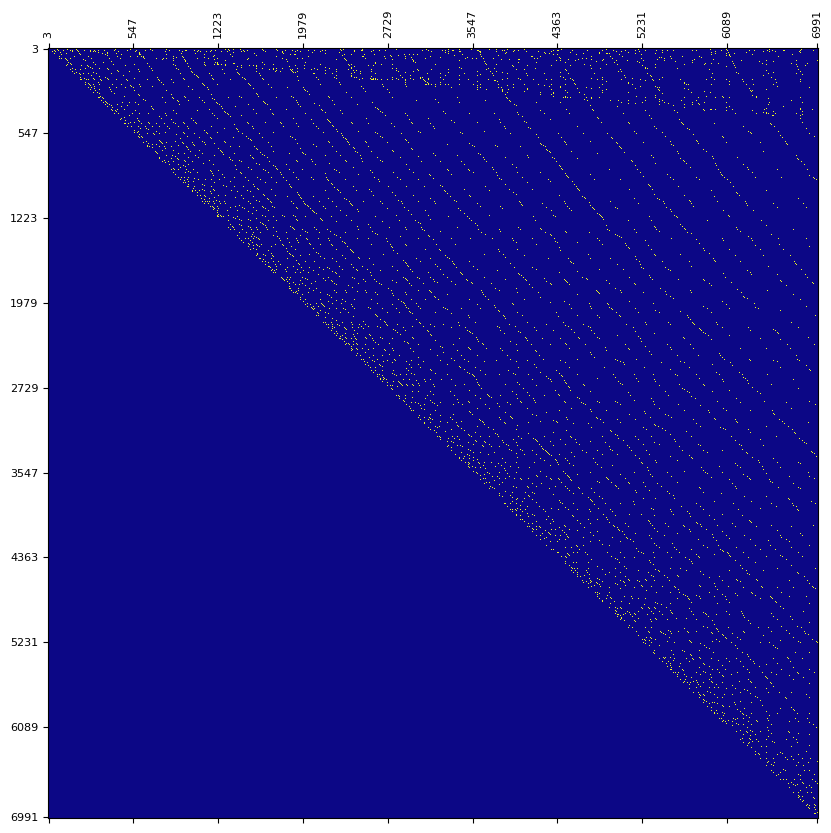

In [17]:
matrix_31, prime_map_31 = plot_condition_matrix(df_primes, 'condition_31', cmap="plasma") # cmap="inferno"

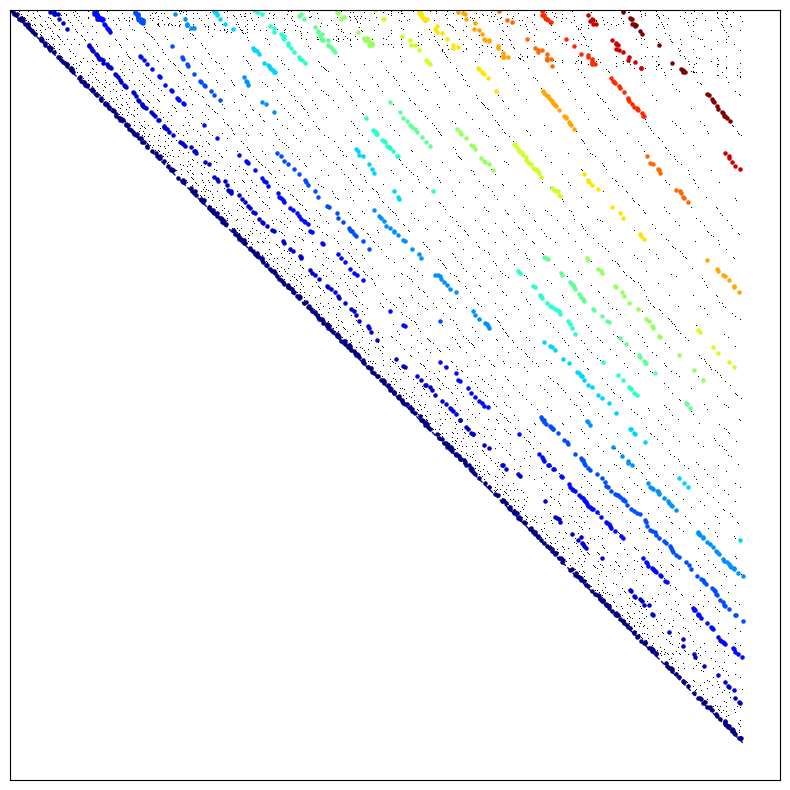

[(0, 2), (2, 3), (4, 5), (4, 8), (6, 7), (9, 13), (10, 11), (10, 14), (12, 13), (12, 15)]


In [18]:
# Liste der Verschiebungen für die Geraden (z.B. von -50 bis +50 in 10er-Schritten)
shift_values = np.arange(0, 800, 50)

# Linien extrahieren und gleichzeitig plotten
line_points = extract_and_plot_lines(matrix_31, shift_values)

# Zeige die extrahierten Punktlisten an
first_key = next(iter(line_points))
first_10_values = line_points[first_key][:10]
print(first_10_values)

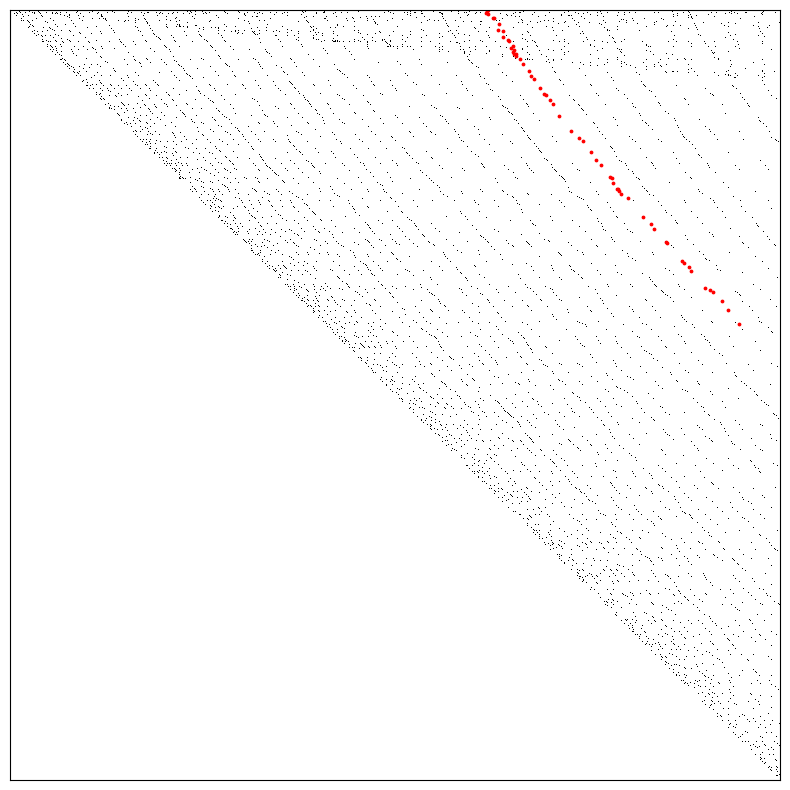

((2400, -1200),
 [(0, 558),
  (1, 556),
  (3, 555),
  (4, 558),
  (9, 564),
  (9, 565),
  (16, 570),
  (23, 569),
  (24, 575),
  (31, 575)])

In [19]:
# Setze die gewünschten Werte für den Mittelpunkt und den Radius
x0 = 2400  # Beispielwert für den Mittelpunkt x0
y0 = -1200  # Beispielwert für den Mittelpunkt y0
fixed_radius = 2200  # Beispielradius

# Extrahiere und plotte den Kreisbogen mit den vorgegebenen Werten
arc_points_custom, computed_center_custom = extract_and_plot_custom_circular_arc(matrix_31, x0, y0, fixed_radius)

# Zeige die berechneten Werte für den Mittelpunkt und die Liste der gefärbten Punkte
computed_center_custom, arc_points_custom[:10]

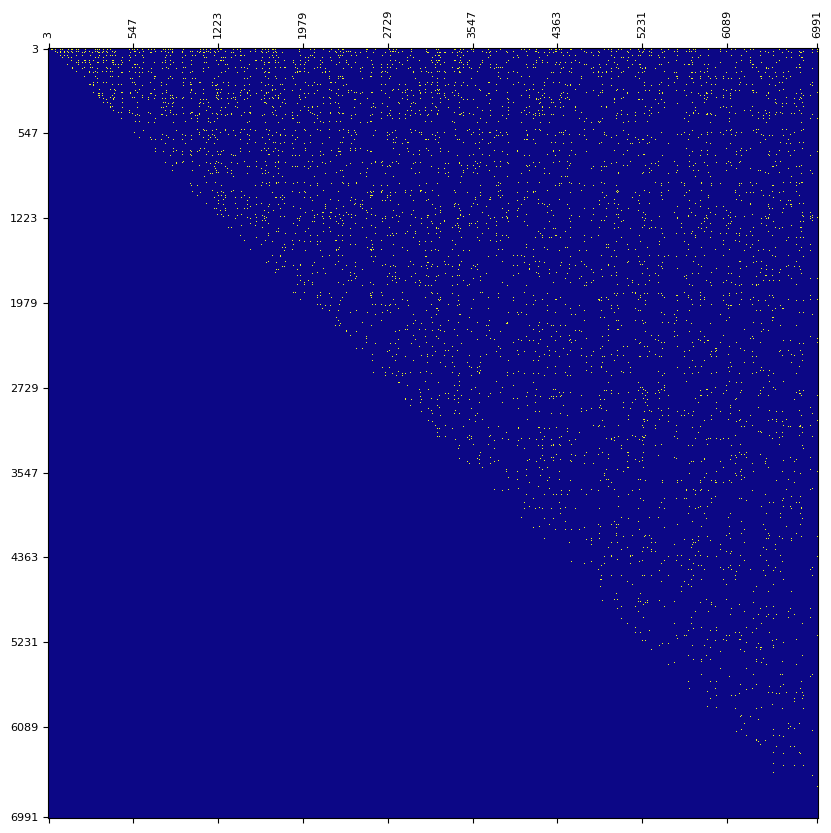

In [20]:
matrix_32, prime_map_32 = plot_condition_matrix(df_primes, 'condition_32', cmap="plasma") # cmap="inferno"

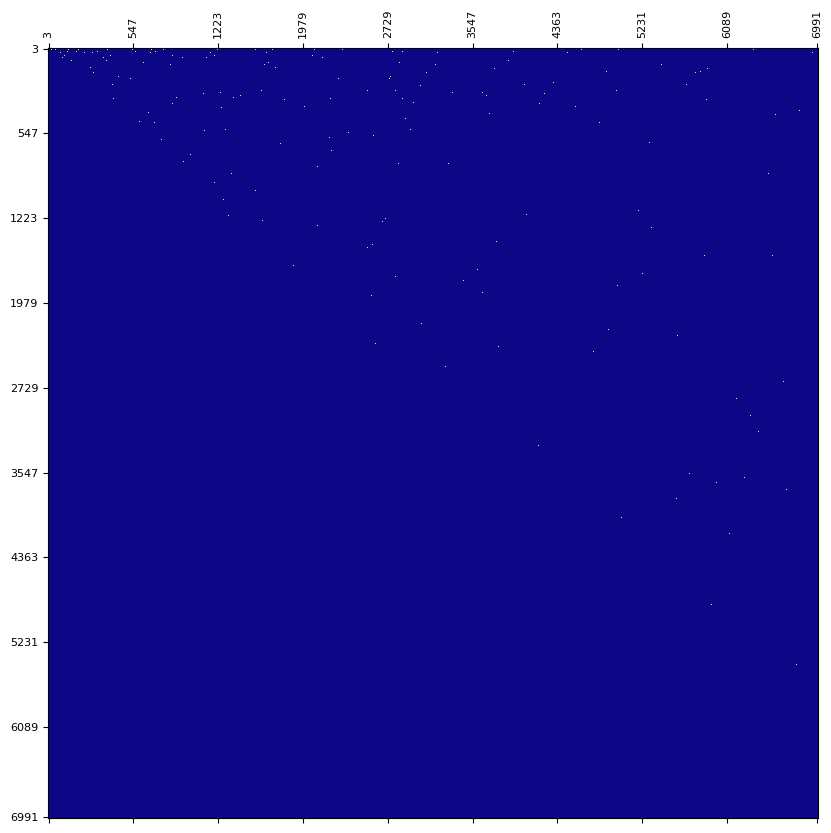

In [21]:
matrix_33, prime_map_33 = plot_condition_matrix(df_primes, 'condition_33', cmap="plasma") # cmap="inferno"

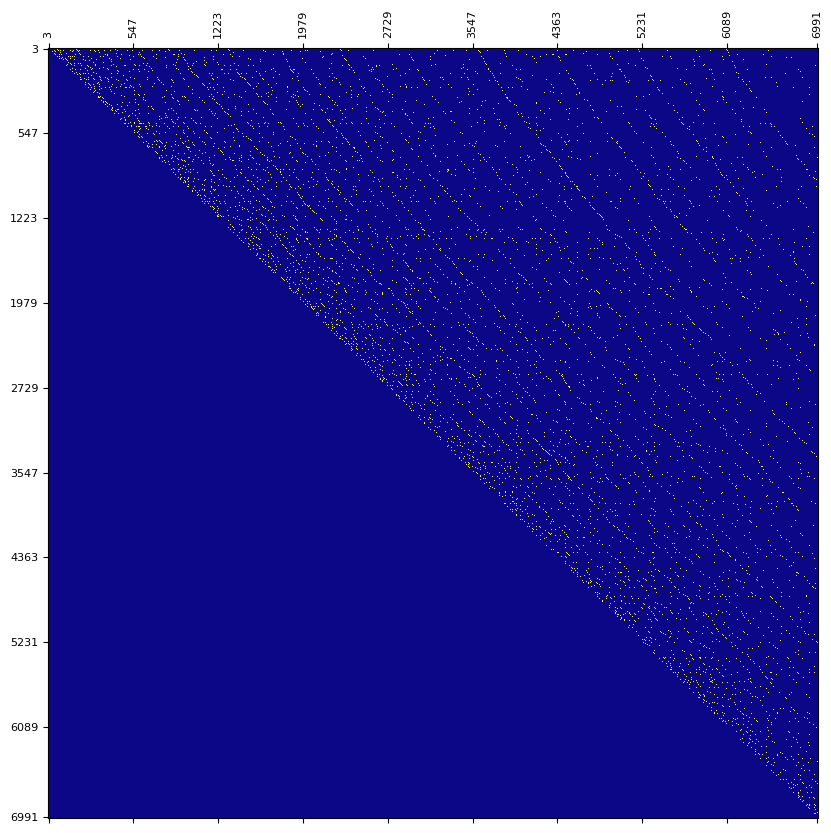

In [22]:
matrix_34, prime_map_34 = plot_condition_matrix(df_primes, 'condition_34', cmap="plasma") # cmap="inferno"

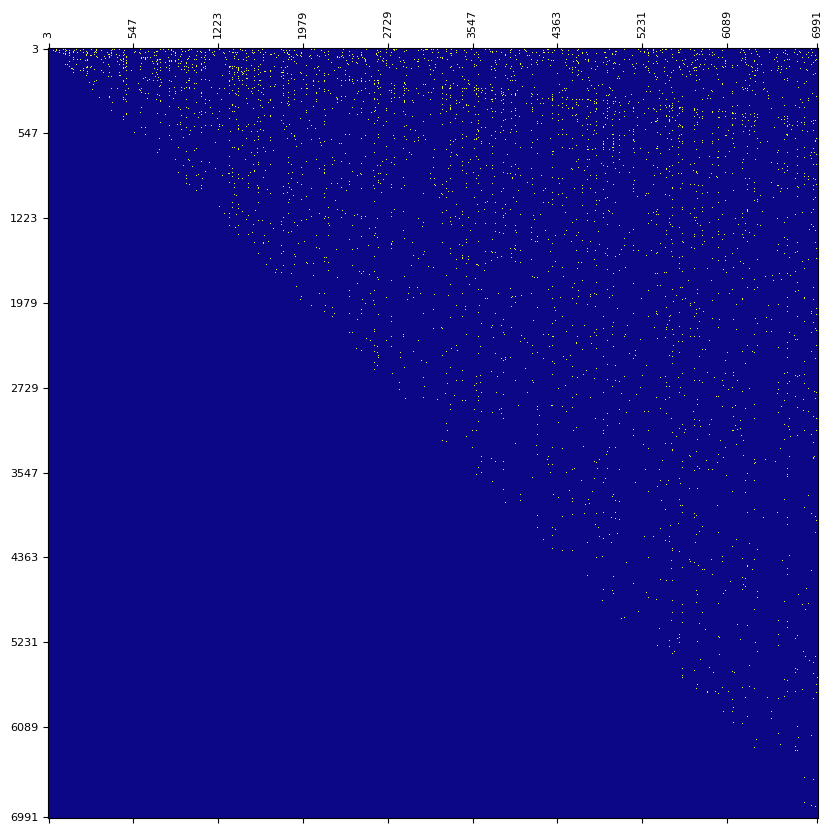

In [23]:
matrix_35, prime_map_35 = plot_condition_matrix(df_primes, 'condition_35', cmap="plasma") # cmap="inferno"

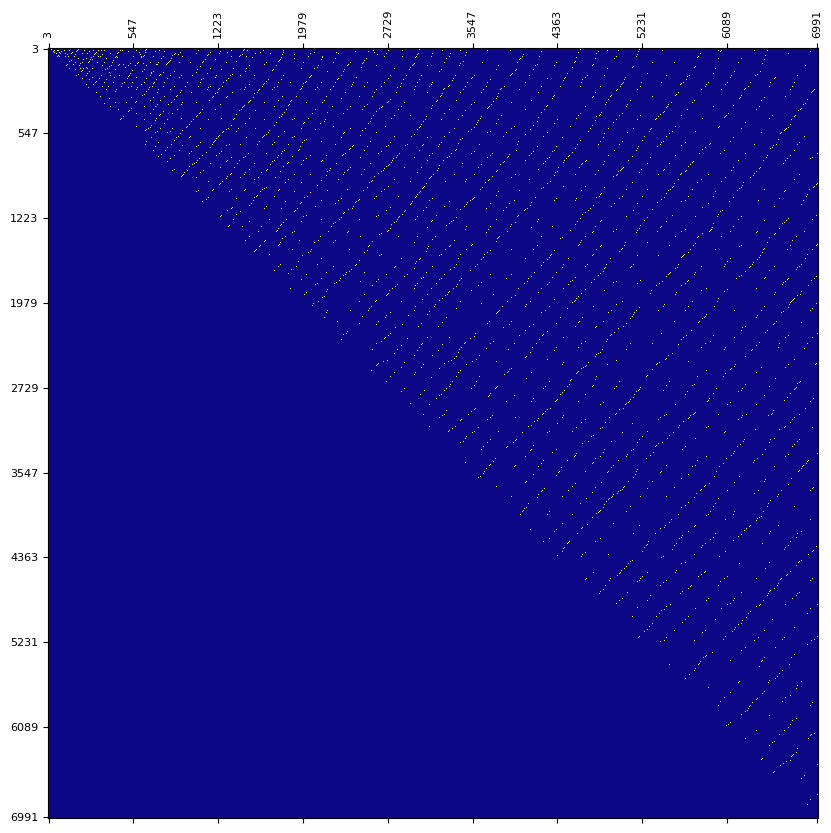

In [24]:
matrix_36, prime_map_36 = plot_condition_matrix(df_primes, 'condition_36', cmap="plasma") # cmap="inferno"

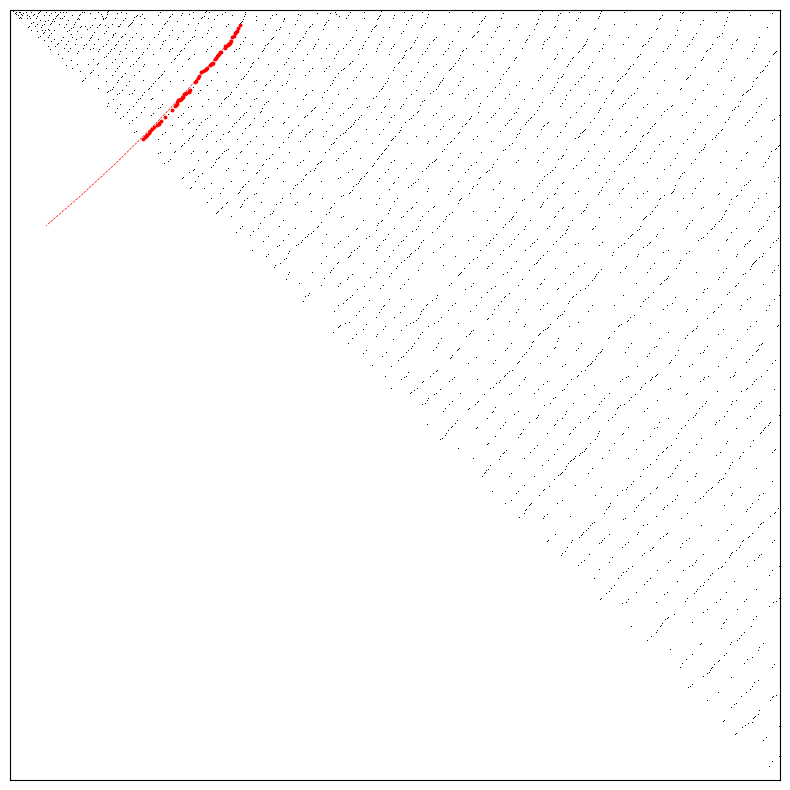

((-1051, -1051),
 [(17, 268),
  (20, 266),
  (24, 264),
  (25, 263),
  (26, 262),
  (30, 261),
  (31, 259),
  (36, 257),
  (38, 256),
  (39, 255)])

In [47]:
# Setze die gewünschten Werte für den Mittelpunkt und den Radius
x0 = -1051  # Beispielwert für den Mittelpunkt x0
y0 = -1051  # Beispielwert für den Mittelpunkt y0
fixed_radius = 1700  # Beispielradius

# Extrahiere und plotte den Kreisbogen mit den vorgegebenen Werten
arc_points_custom, computed_center_custom = extract_and_plot_custom_circular_arc(matrix_36, x0, y0, fixed_radius)

# Zeige die berechneten Werte für den Mittelpunkt und die Liste der gefärbten Punkte
computed_center_custom, arc_points_custom[:10]